# $\text{Import libraries}$

## $\text{Installed libraries}$

In [1]:
import polars as pl
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

C:\Users\ngako\AppData\Local\Temp\ipykernel_58140\2862266976.py:3: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


## $\text{Built-in libraries}$

In [2]:
from pathlib import Path
from shutil import copyfile, rmtree

# $\text{Examine data}$

In [3]:
DATASET_PATH = (
    Path(".").resolve().parents[3] / "Dataset" / "Raw" / "popular_street_foods"
)

## $\text{Image data stats}$

In [4]:
raw_stat_data = pl.read_csv(
    DATASET_PATH / "dataset_stats.csv",
    has_header=True,
)

In [5]:
raw_stat_data.describe()

statistic,class,image_count,avg_width,avg_height,min_width,min_height,max_width,max_height,formats,corrupt_files
str,str,f64,f64,f64,f64,f64,f64,f64,str,f64
"""count""","""20""",20.0,20.0,20.0,20.0,20.0,20.0,20.0,"""20""",20.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",null,185.55,138.1,125.1,82.0,68.7,162.0,140.0,null,0.0
"""std""",null,16.391509,6.356927,4.037978,10.682007,11.220751,0.0,0.0,null,0.0
"""min""","""arepas""",158.0,129.0,119.0,54.0,50.0,162.0,140.0,"""jpeg""",0.0
"""25%""",null,175.0,133.0,121.0,78.0,63.0,162.0,140.0,null,0.0
"""50%""",null,196.0,138.0,125.0,84.0,68.0,162.0,140.0,null,0.0
"""75%""",null,200.0,144.0,128.0,91.0,77.0,162.0,140.0,null,0.0
"""max""","""tacos""",200.0,147.0,131.0,93.0,90.0,162.0,140.0,"""jpeg, png""",0.0


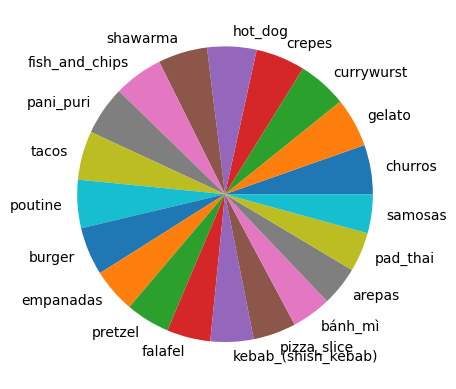

In [6]:
plt.pie(
    raw_stat_data["image_count"].to_list(),
    labels=raw_stat_data["class"].to_list(),
)
plt.show()

In [7]:
raw_stat_data

class,image_count,avg_width,avg_height,min_width,min_height,max_width,max_height,formats,corrupt_files
str,i64,i64,i64,i64,i64,i64,i64,str,i64
"""churros""",200,135,127,88,57,162,140,"""jpeg""",0
"""gelato""",200,145,122,78,55,162,140,"""jpeg, png""",0
"""currywurst""",200,142,121,54,63,162,140,"""jpeg""",0
"""crepes""",200,134,128,93,79,162,140,"""jpeg""",0
"""hot_dog""",200,143,121,89,54,162,140,"""jpeg""",0
…,…,…,…,…,…,…,…,…,…
"""pizza_slice""",174,146,125,78,72,162,140,"""jpeg, png""",0
"""bánh_mì""",160,147,120,70,63,162,140,"""jpeg""",0
"""arepas""",160,144,121,93,68,162,140,"""jpeg""",0


resize to (140x140)

## $\text{Images}$

In [8]:
img_list = list(
    str(i.relative_to(DATASET_PATH / "dataset").as_posix())
    for i in (DATASET_PATH / "dataset").rglob("*.[jpeg png]*")
)

In [9]:
images_df = pl.DataFrame({
    "raw_path": img_list,
})


In [10]:
images_df = images_df.with_columns(
    pl.col("raw_path").str.split("/").list.to_struct(fields=["class", "file_name"])
).unnest("raw_path")

In [11]:
images_df.with_row_index()

index,class,file_name
u32,str,str
0,"""arepas""","""0001.jpg"""
1,"""arepas""","""0002.jpg"""
2,"""arepas""","""0003.jpg"""
3,"""arepas""","""0004.jpg"""
4,"""arepas""","""0005.jpg"""
…,…,…
3669,"""tacos""","""0194.jpg"""
3670,"""tacos""","""0195.jpg"""
3671,"""tacos""","""0196.jpg"""


## $\text{Visualize image}$

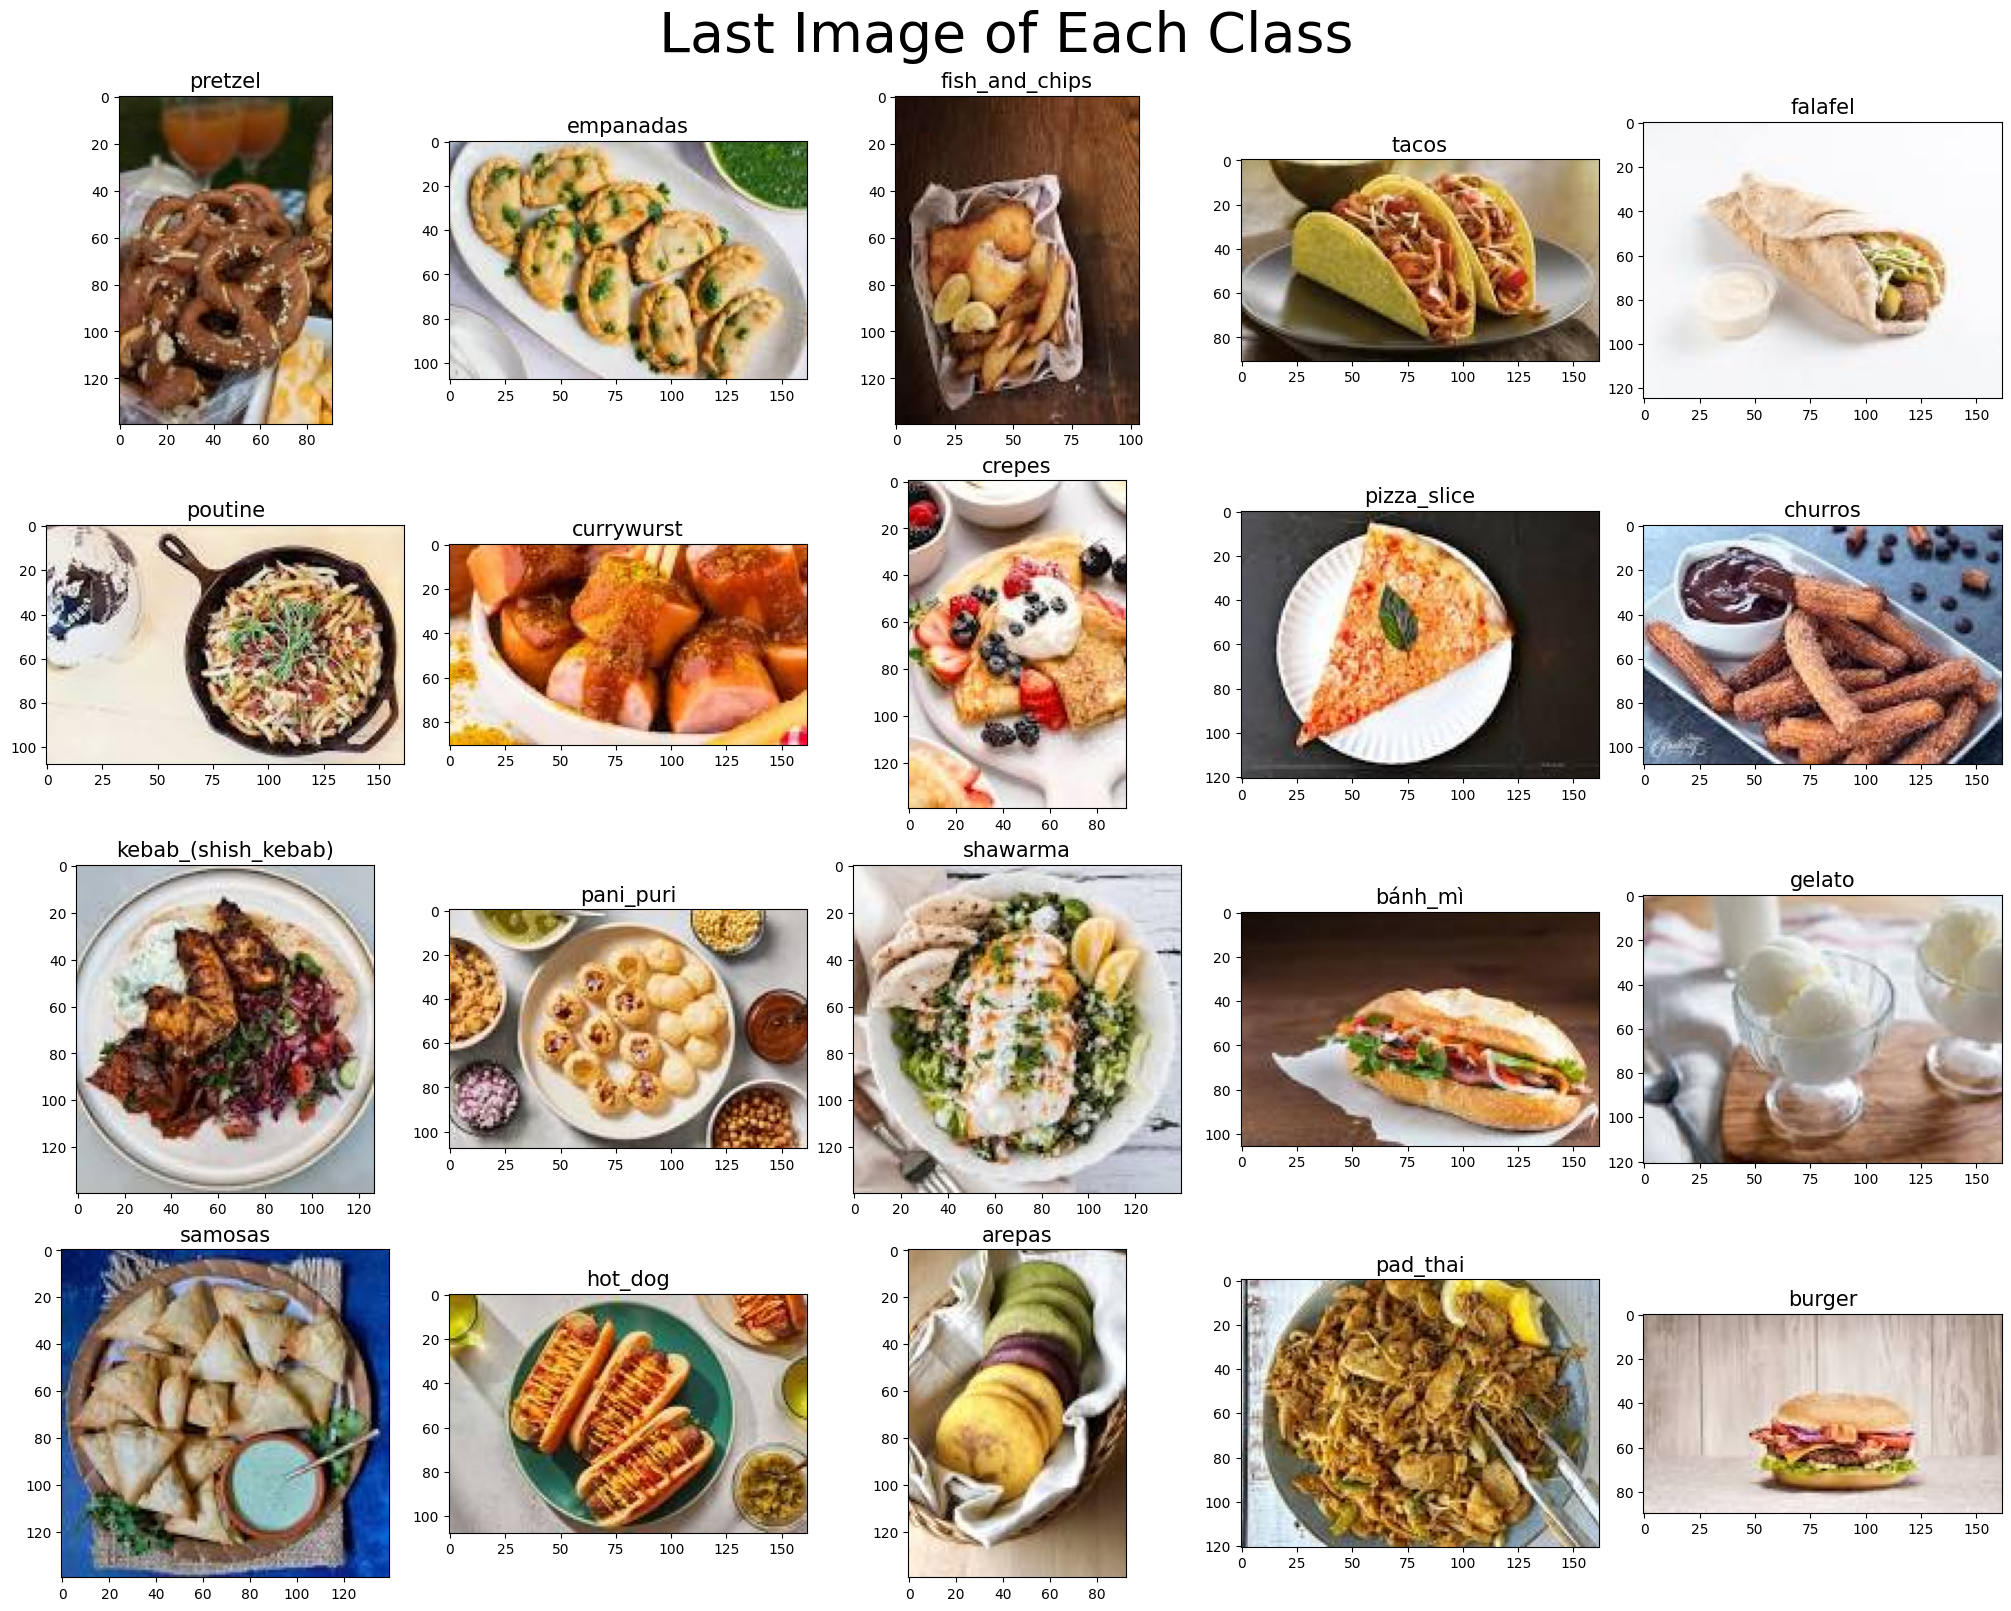

In [12]:
fig, axs = plt.subplots(4, 5, figsize=(20, 16), layout="constrained")
axs = axs.flatten()
for i, row in enumerate(images_df.group_by("class").last().to_dicts()):
    img_path = DATASET_PATH / "dataset" / row["class"] / row["file_name"]
    axs[i].imshow(plt.imread(img_path))
    axs[i].set_title(row["class"], fontsize=15)

fig.suptitle("Last Image of Each Class", fontsize=40)
plt.show()

# $\text{Split data}$

In [13]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.2
TEST_SIZE = 0.1


In [14]:
shuffled_images_df = images_df.sample(fraction=1, shuffle=True, seed=6742).sort("class")

In [26]:
shuffled_images_df[10].item()

ValueError: can only call `.item()` if the dataframe is of shape (1, 1), or if explicit row/col values are provided; frame has shape (1, 2)

In [ ]:
shuffled_images_df.select(
    pl.col("class").cast(pl.Categorical).cat.set_ordering("lexical", descending=True)
)

class_id
cat
"""arepas"""
"""burger"""
"""bánh_mì"""
"""churros"""
"""crepes"""
…
"""poutine"""
"""pretzel"""
"""samosas"""


In [35]:
shuffled_images_df = (
    shuffled_images_df.group_by("class")
    .all()
    .with_columns(pl.col("file_name").list.len().alias("image_count"))
    .explode("file_name")
    .with_columns(pl.int_range(1, pl.len().add(1)).over("class").alias("image_index"))
    .sort(pl.all())
    .with_columns(
        pl.when(
            pl.col("image_index") < (TRAIN_SIZE * pl.col("image_count").cast(pl.Int32))
        )
        .then(pl.lit("train"))
        .otherwise(
            pl.when(
                pl.col("image_index")
                < ((TRAIN_SIZE + VAL_SIZE) * pl.col("image_count")).cast(pl.Int32)
            )
            .then(pl.lit("val"))
            .otherwise(pl.lit("test"))
        )
        .alias("split")
    )
)

In [29]:
Split_path = DATASET_PATH.parents[1] / "Split"
if Split_path.exists():
    print(f"Directory already exists: {Split_path}")
    rmtree(Split_path)
    print(f"Removed existing directory: {Split_path}")
print(f"Creating directory: {Split_path}\n\n")
Split_path.mkdir(parents=True, exist_ok=True)

for split in ["train", "val", "test"]:
    split_path = Split_path / split
    split_path.mkdir(parents=True, exist_ok=True)
    print(f"Creating directory: {split_path}")

Directory already exists: D:\pythonProject\Lightning_prj\Dataset\Split
Removed existing directory: D:\pythonProject\Lightning_prj\Dataset\Split
Creating directory: D:\pythonProject\Lightning_prj\Dataset\Split


Creating directory: D:\pythonProject\Lightning_prj\Dataset\Split\train
Creating directory: D:\pythonProject\Lightning_prj\Dataset\Split\val
Creating directory: D:\pythonProject\Lightning_prj\Dataset\Split\test


In [37]:
for row in tqdm(
    shuffled_images_df.iter_rows(named=True), total=shuffled_images_df.height
):
    split = row["split"]
    class_name = row["class"]
    file_name = row["file_name"]

    src_path = DATASET_PATH / "dataset" / class_name / file_name
    dest_path = Split_path / split / f"{class_name}_{file_name}"
    copyfile(src_path, dest_path)

100%|██████████| 3674/3674 [00:09<00:00, 374.76it/s]


In [40]:
shuffled_images_df.select("class", "file_name", "split").write_csv(
    Split_path / "split_info.csv",
)
